# **Ejemplo de Clase**

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
datos = {
    'Metodo': ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'C'],
    'Valores': [58, 64, 55, 66, 67, 58, 69, 71, 64, 68, 48, 57, 59, 47, 49]
}

# Creación del DataFrame
data = pd.DataFrame(datos)

In [ ]:
data.head()

,Metodo,Valores
0,A,58
1,A,64
2,A,55
3,A,66
4,A,67


<ipython-input-4-9c013e990d0b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data, x='Valores', y='Metodo', inner='stick', palette='Dark2')


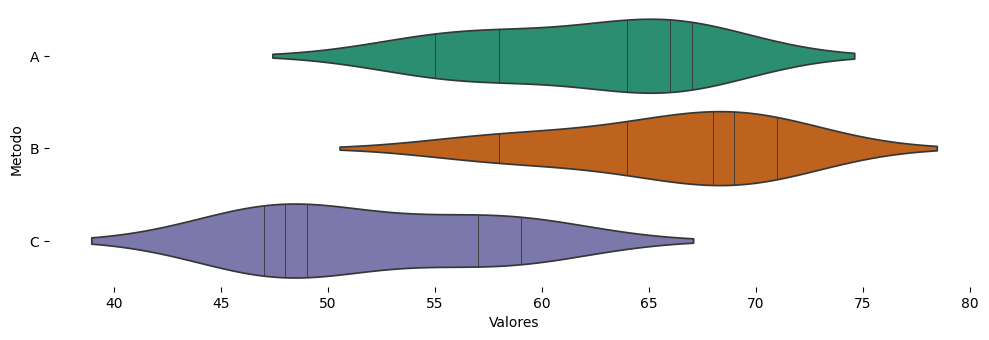

In [ ]:
# @title Metodo vs Valores

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['Metodo'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='Valores', y='Metodo', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
# prompt: quiero un analisis descriptivo de los métodos con la función groupby

grouped_data = data.groupby('Metodo')['Valores'].describe()

grouped_data

,count,mean,std,min,25%,50%,75%,max
Metodo,,,,,,,,
A,5.0,62.0,5.244044,55.0,58.0,64.0,66.0,67.0
B,5.0,66.0,5.147815,58.0,64.0,68.0,69.0,71.0
C,5.0,52.0,5.567764,47.0,48.0,49.0,57.0,59.0


In [ ]:
data.groupby('Metodo').describe()

Valores                                              
         count  mean       std   min   25%   50%   75%   max
Metodo                                                      
A          5.0  62.0  5.244044  55.0  58.0  64.0  66.0  67.0
B          5.0  66.0  5.147815  58.0  64.0  68.0  69.0  71.0
C          5.0  52.0  5.567764  47.0  48.0  49.0  57.0  59.0

In [ ]:
modelo_anova = ols('Valores ~ Metodo', data=data).fit()

In [ ]:
modelo_anova

In [ ]:
resultado_anova = sm.stats.anova_lm(modelo_anova, typ=1)

In [ ]:
resultado_anova

,df,sum_sq,mean_sq,F,PR(>F)
Metodo,2.0,520.0,260.000000,9.176471,0.003818
Residual,12.0,340.0,28.333333,NaN,NaN


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B      4.0  0.482  -4.9814 12.9814  False
     A      C    -10.0 0.0292 -18.9814 -1.0186   True
     B      C    -14.0 0.0035 -22.9814 -5.0186   True
-----------------------------------------------------


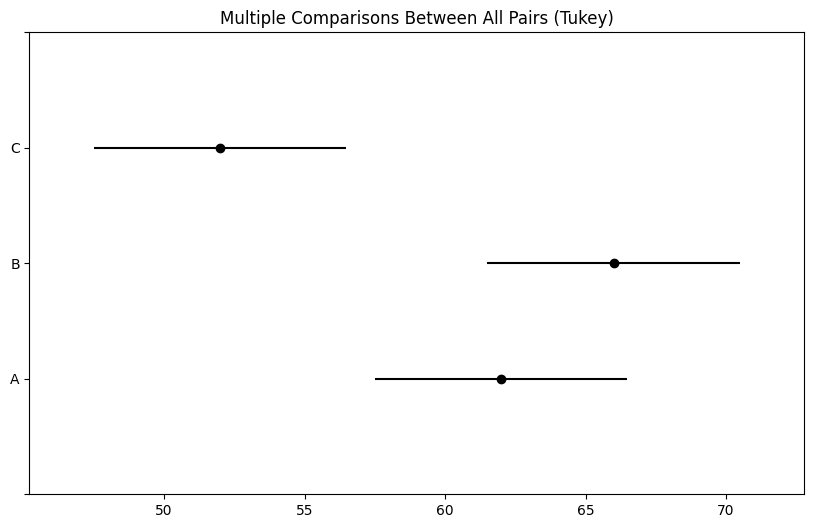

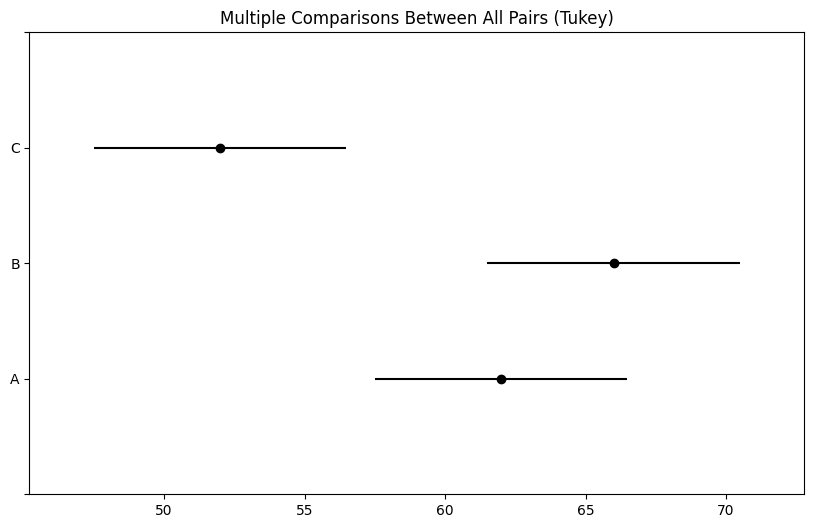

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Aplicar la prueba de Tukey
tukey_resultados = pairwise_tukeyhsd(endog=data['Valores'], groups=data['Metodo'], alpha=0.05)

# Mostrar los resultados
print(tukey_resultados)
tukey_resultados.plot_simultaneous()


# **Ejemplo #2**

In [ ]:
!pip install pingouin

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
from statsmodels.graphics.factorplots import interaction_plot

In [ ]:
posicion = ["OF", "IF", "IF", "OF", "IF", "IF", "OF", "OF", "IF", "IF", "OF",
            "OF", "IF", "OF", "IF", "IF", "IF", "OF", "IF", "OF", "IF", "OF",
            "IF", "OF", "IF", "DH", "IF", "IF", "IF", "OF", "IF", "IF", "IF",
            "IF", "OF", "IF", "OF", "IF", "IF", "IF", "IF", "OF", "OF", "IF",
            "OF", "OF", "IF", "IF", "OF", "OF", "IF", "OF", "OF", "OF", "IF",
            "DH", "OF", "OF", "OF", "IF", "IF", "IF", "IF", "OF", "IF", "IF",
            "OF", "IF", "IF", "IF", "OF", "IF", "IF", "OF", "IF", "IF", "IF",
            "IF", "IF", "IF", "OF", "DH", "OF", "OF", "IF", "IF", "IF", "OF",
            "IF", "OF", "IF", "IF", "IF", "IF", "OF", "OF", "OF", "DH", "OF",
            "IF", "IF", "OF", "OF", "C", "IF", "OF", "OF", "IF", "OF", "IF",
            "IF", "IF", "OF", "C", "OF", "IF", "C", "OF", "IF", "DH", "C", "OF",
            "OF", "IF", "C", "IF", "IF", "IF", "IF", "IF", "IF", "OF", "C", "IF",
            "OF", "OF", "IF", "OF", "IF", "OF", "DH", "C", "IF", "OF", "IF",
            "IF", "OF", "IF", "OF", "IF", "C", "IF", "IF", "OF", "IF", "IF",
            "IF", "OF", "OF", "OF", "IF", "IF", "C", "IF", "C", "C", "OF", "OF",
            "OF", "IF", "OF", "IF", "C", "DH", "DH", "C", "OF", "IF", "OF", "IF",
            "IF", "IF", "C", "IF", "OF", "DH", "IF", "IF", "IF", "OF", "OF", "C",
            "OF", "OF", "IF", "IF", "OF", "OF", "OF", "OF", "OF", "OF", "IF",
            "IF", "DH", "OF", "IF", "IF", "OF", "IF", "IF", "IF", "IF", "OF",
            "IF", "C", "IF", "IF", "C", "IF", "OF", "IF", "DH", "C", "OF", "C",
            "IF", "IF", "OF", "C", "IF", "IF", "IF", "C", "C", "C", "OF", "OF",
            "IF", "IF", "IF", "IF", "OF", "OF", "C", "IF", "IF", "OF", "C", "OF",
            "OF", "OF", "OF", "OF", "OF", "OF", "OF", "OF", "OF", "OF", "C",
            "IF", "DH", "IF", "C", "DH", "C", "IF", "C", "OF", "C", "C", "IF",
            "OF", "IF", "IF", "IF", "IF", "IF", "IF", "IF", "IF", "OF", "OF",
            "OF", "IF", "OF", "OF", "IF", "IF", "IF", "OF", "C", "IF", "IF",
            "IF", "IF", "OF", "OF", "IF", "OF", "IF", "OF", "OF", "OF", "IF",
            "OF", "OF", "IF", "OF", "IF", "C", "IF", "IF", "C", "DH", "OF", "IF",
            "C", "C", "IF", "C", "IF", "OF", "C", "C", "OF"]

bateo = [0.359, 0.34, 0.33, 0.341, 0.366, 0.333, 0.37, 0.331, 0.381, 0.332,
         0.365, 0.345, 0.313, 0.325, 0.327, 0.337, 0.336, 0.291, 0.34, 0.31,
         0.365, 0.356, 0.35, 0.39, 0.388, 0.345, 0.27, 0.306, 0.393, 0.331,
         0.365, 0.369, 0.342, 0.329, 0.376, 0.414, 0.327, 0.354, 0.321, 0.37,
         0.313, 0.341, 0.325, 0.312, 0.346, 0.34, 0.401, 0.372, 0.352, 0.354,
         0.341, 0.365, 0.333, 0.378, 0.385, 0.287, 0.303, 0.334, 0.359, 0.352,
         0.321, 0.323, 0.302, 0.349, 0.32, 0.356, 0.34, 0.393, 0.288, 0.339,
         0.388, 0.283, 0.311, 0.401, 0.353, 0.42, 0.393, 0.347, 0.424, 0.378,
         0.346, 0.355, 0.322, 0.341, 0.306, 0.329, 0.271, 0.32, 0.308, 0.322,
         0.388, 0.351, 0.341, 0.31, 0.393, 0.411, 0.323, 0.37, 0.364, 0.321,
         0.351, 0.329, 0.327, 0.402, 0.32, 0.353, 0.319, 0.319, 0.343, 0.288,
         0.32, 0.338, 0.322, 0.303, 0.356, 0.303, 0.351, 0.325, 0.325, 0.361,
         0.375, 0.341, 0.383, 0.328, 0.3, 0.277, 0.359, 0.358, 0.381, 0.324,
         0.293, 0.324, 0.329, 0.294, 0.32, 0.361, 0.347, 0.317, 0.316, 0.342,
         0.368, 0.319, 0.317, 0.302, 0.321, 0.336, 0.347, 0.279, 0.309, 0.358,
         0.318, 0.342, 0.299, 0.332, 0.349, 0.387, 0.335, 0.358, 0.312, 0.307,
         0.28, 0.344, 0.314, 0.24, 0.331, 0.357, 0.346, 0.351, 0.293, 0.308,
         0.374, 0.362, 0.294, 0.314, 0.374, 0.315, 0.324, 0.382, 0.353, 0.305,
         0.338, 0.366, 0.357, 0.326, 0.332, 0.323, 0.306, 0.31, 0.31, 0.333,
         0.34, 0.4, 0.389, 0.308, 0.411, 0.278, 0.326, 0.335, 0.316, 0.371,
         0.314, 0.384, 0.379, 0.32, 0.395, 0.347, 0.307, 0.326, 0.316, 0.341,
         0.308, 0.327, 0.337, 0.36, 0.32, 0.372, 0.306, 0.305, 0.347, 0.281,
         0.281, 0.296, 0.306, 0.343, 0.378, 0.393, 0.337, 0.327, 0.336, 0.32,
         0.381, 0.306, 0.358, 0.311, 0.284, 0.364, 0.315, 0.342, 0.367, 0.307,
         0.351, 0.372, 0.304, 0.296, 0.332, 0.312, 0.437, 0.295, 0.316, 0.298,
         0.302, 0.342, 0.364, 0.304, 0.295, 0.305, 0.359, 0.335, 0.338, 0.341,
         0.3, 0.378, 0.412, 0.273, 0.308, 0.309, 0.263, 0.291, 0.359, 0.352,
         0.262, 0.274, 0.334, 0.343, 0.267, 0.321, 0.3, 0.327, 0.313, 0.316,
         0.337, 0.268, 0.342, 0.292, 0.39, 0.332, 0.315, 0.298, 0.298, 0.331,
         0.361, 0.272, 0.287, 0.34, 0.317, 0.327, 0.354, 0.317, 0.311, 0.174,
         0.302, 0.302, 0.291, 0.29, 0.268, 0.352, 0.341, 0.265, 0.307, 0.36,
         0.305, 0.254, 0.279, 0.321, 0.305, 0.35, 0.308, 0.326, 0.219, 0.23,
         0.322, 0.405, 0.321, 0.291, 0.312, 0.357, 0.324]

In [ ]:
datos= pd.DataFrame({'posicion':posicion, 'bateo':bateo})

In [ ]:
datos.tail()

,posicion,bateo
322,IF,0.321
323,OF,0.291
324,C,0.312
325,C,0.357
326,OF,0.324


In [ ]:
datos.groupby('posicion').size()

posicion
C      39
DH     14
IF    154
OF    120
dtype: int64

In [ ]:
datos.groupby('posicion').agg(['mean','std'])

bateo          
              mean       std
posicion                    
C         0.322615  0.045132
DH        0.347786  0.036037
IF        0.331526  0.037095
OF        0.334250  0.029444

# **Análisis gráfico**

<Axes: xlabel='posicion', ylabel='bateo'>

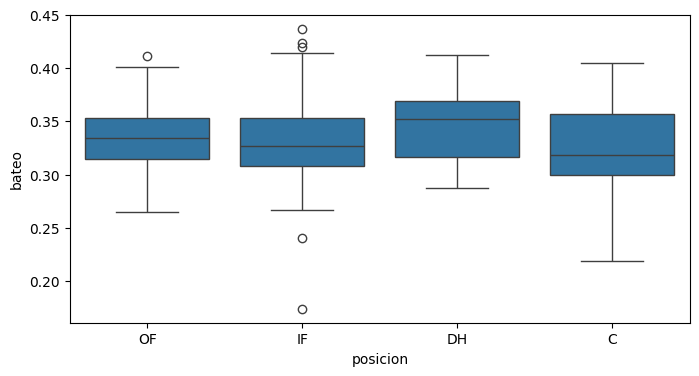

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(8,4))
sns.boxplot(x='posicion', y='bateo', data=datos, ax=ax)

<Axes: xlabel='posicion', ylabel='bateo'>

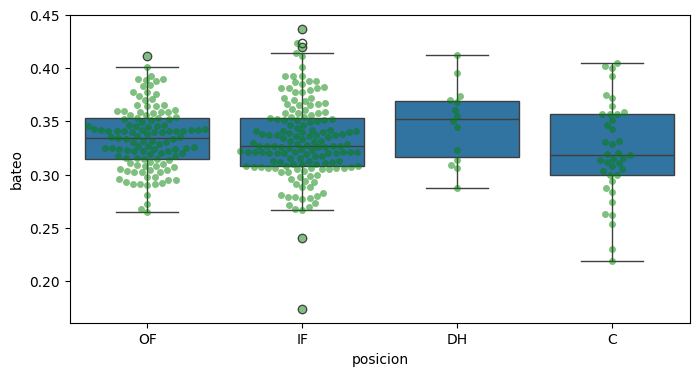

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(8,4))
sns.boxplot(x='posicion', y='bateo', data=datos, ax=ax)
sns.swarmplot(x='posicion', y='bateo', data=datos, color='green', alpha=0.5, ax=ax)

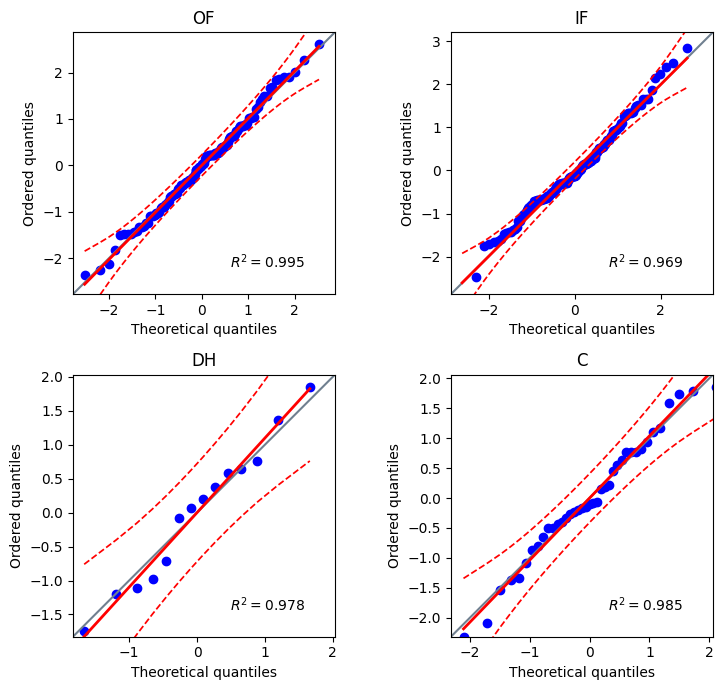

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(8, 7))
pg.qqplot(datos.loc[datos.posicion=='OF', 'bateo'], dist='norm', ax=axs[0,0])
axs[0,0].set_title('OF')
pg.qqplot(datos.loc[datos.posicion=='IF', 'bateo'], dist='norm', ax=axs[0,1])
axs[0,1].set_title('IF')
pg.qqplot(datos.loc[datos.posicion=='DH', 'bateo'], dist='norm', ax=axs[1,0])
axs[1,0].set_title('DH')
pg.qqplot(datos.loc[datos.posicion=='C', 'bateo'], dist='norm', ax=axs[1,1])
axs[1,1].set_title('C')
plt.tight_layout()

In [ ]:
pg.normality(data=datos, dv='bateo', group='posicion')

,W,pval,normal
posicion,,,
OF,0.993361,0.842249,True
IF,0.974849,0.006406,False
DH,0.972155,0.904090,True
C,0.980154,0.709167,True


In [ ]:
pg.homoscedasticity(data=datos, dv='bateo', group='posicion', method='levene')

,W,pval,equal_var
levene,2.605659,0.051799,True


In [ ]:
pg.anova(data=datos, dv='bateo', between='posicion', detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,posicion,0.007557,3,0.002519,1.994349,0.114693,0.018186
1,Within,0.407984,323,0.001263,NaN,NaN,NaN


In [ ]:


pg.pairwise_tukey(data=datos, dv='bateo', between='posicion').round(3)

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,C,DH,0.323,0.348,-0.025,0.011,-2.273,0.106,-0.577
1,C,IF,0.323,0.332,-0.009,0.006,-1.399,0.501,-0.229
2,C,OF,0.323,0.334,-0.012,0.007,-1.776,0.287,-0.341
3,DH,IF,0.348,0.332,0.016,0.010,1.639,0.358,0.437
4,DH,OF,0.348,0.334,0.014,0.010,1.349,0.533,0.446
5,IF,OF,0.332,0.334,-0.003,0.004,-0.629,0.923,-0.080


Una empresa de materiales de construcción quiere estudiar la influencia que tienen el grosor y el tipo de templado sobre la resistencia máxima de unas láminas de acero. Para ello miden el estrés hasta la rotura (variable cuantitativa dependiente) para dos tipos de templado (lento y rápido) y tres grosores de lámina (8mm, 16mm y 24 mm).

Nota: con el objetivo de simplificar el ejemplo, se asume que se cumplen las condiciones para un ANOVA de dos vías. En un caso real, siempre hay que validar las condiciones sobre las que se apoya un método o técnica.

In [ ]:
resistencia = [15.29, 15.89, 16.02, 16.56, 15.46, 16.91, 16.99, 17.27, 16.85,
               16.35, 17.23, 17.81, 17.74, 18.02, 18.37, 12.07, 12.42, 12.73,
               13.02, 12.05, 12.92, 13.01, 12.21, 13.49, 14.01, 13.30, 12.82,
               12.49, 13.55, 14.53]

templado = ["rapido"] * 15 + ["lento"] * 15

grosor = ([8] * 5 + [16] * 5 + [24] * 5) * 2

datos = pd.DataFrame({
    'templado': templado,
    'grosor': grosor,
    'resistencia': resistencia
})

In [ ]:
datos.head(30)

,templado,grosor,resistencia
0,rapido,8,15.29
1,rapido,8,15.89
2,rapido,8,16.02
3,rapido,8,16.56
4,rapido,8,15.46
5,rapido,16,16.91
6,rapido,16,16.99
7,rapido,16,17.27
8,rapido,16,16.85
9,rapido,16,16.35


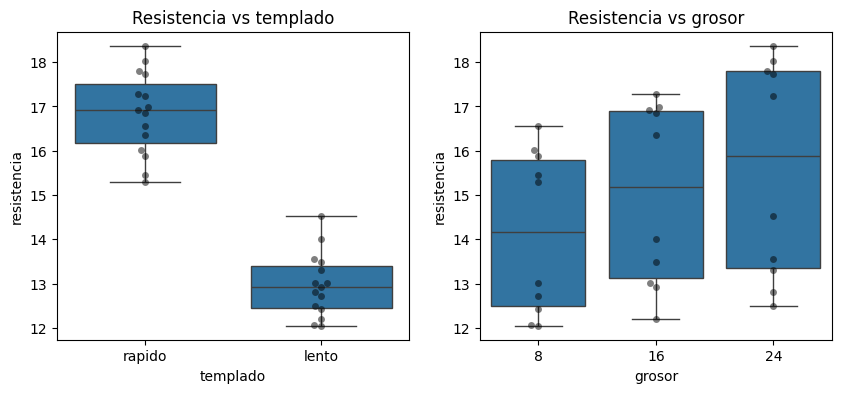

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].set_title('Resistencia vs templado')
sns.boxplot(x="templado", y="resistencia", data=datos, ax=axs[0])
sns.swarmplot(x="templado", y="resistencia", data=datos, color='black',
              alpha = 0.5, ax=axs[0])

axs[1].set_title('Resistencia vs grosor')
sns.boxplot(x="grosor", y="resistencia", data=datos, ax=axs[1])
sns.swarmplot(x="grosor", y="resistencia", data=datos, color='black',
              alpha = 0.5, ax=axs[1]);

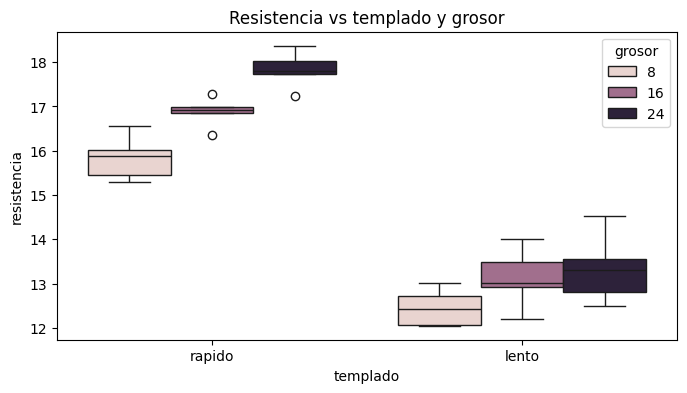

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title('Resistencia vs templado y grosor')
sns.boxplot(x="templado", y="resistencia", hue='grosor', data=datos, ax=ax);

In [ ]:
print('Resistencia media y desviación típica por templado')
datos.groupby('templado')['resistencia'].agg(['mean', 'std'])

Resistencia media y desviación típica por templado


,mean,std
templado,,
lento,12.974667,0.711345
rapido,16.850667,0.927643


In [ ]:
print('Resistencia media y desviación típica por grosor')
datos.groupby('grosor')['resistencia'].agg(['mean', 'std'])

Resistencia media y desviación típica por grosor


,mean,std
grosor,,
8,14.151,1.836993
16,15.001,2.036797
24,15.586,2.442354


In [ ]:
print('Resistencia media y desviación típica por templado y grosor')
datos.groupby(['templado', 'grosor'])['resistencia'].agg(['mean', 'std'])

Resistencia media y desviación típica por templado y grosor


mean       std
templado grosor                  
lento    8       12.458  0.420797
         16      13.128  0.672473
         24      13.338  0.783371
rapido   8       15.844  0.500030
         16      16.874  0.334186
         24      17.834  0.417169

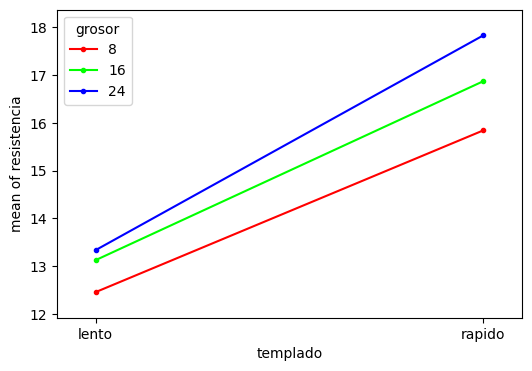

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    x        = datos.templado,
    trace    = datos.grosor,
    response = datos.resistencia,
    ax       = ax,
)

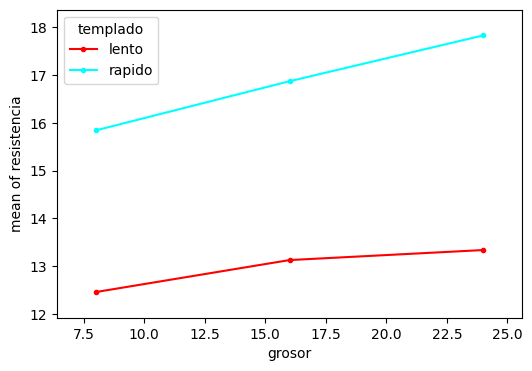

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    x        = datos.grosor,
    trace    = datos.templado,
    response = datos.resistencia,
    ax       = ax,
)

In [ ]:
pg.anova(
    data     = datos,
    dv       = 'resistencia',
    between  = ['templado', 'grosor'],
    detailed = True
).round(4)

,Source,SS,DF,MS,F,p-unc,np2
0,templado,112.6753,1,112.6753,380.0820,0.0000,0.9406
1,grosor,10.4132,2,5.2066,17.5631,0.0000,0.5941
2,templado * grosor,1.6035,2,0.8018,2.7045,0.0873,0.1839
3,Residual,7.1148,24,0.2964,NaN,NaN,NaN
